# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Laptop Prices Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-info alert-warning ">

# <span style=" color:red"> Laptop Prices Project
</span>

Welcome to the data analysis assignment on laptop prices! In this assignment, we will work with a dataset containing information about various laptops. The dataset includes several features detailing laptop specifications, such as brand, type, screen size, hardware details, and price. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
data = pd.read_csv("laptop_data.csv") 
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df = data.copy()

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 

<div class="alert alert-block alert-success">

### <span style=" color:red"> Remove unnecessary columns:
</span>

- Drop the Unnamed: 0 column as it seems to be an index column.

In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for duplicates and missing values:

- Identify and remove any duplicate rows from the dataset.

- Check for missing values in the dataset.

In [6]:
df.duplicated().sum()

np.int64(29)

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

<div class="alert alert-block alert-success">

### <span style=" color:red"> Standardize data formats:

- Convert Weight to a numeric column (strip the "kg" and convert to float) etc. Apply similar operations to other required columns. You may consider adding new features.

- Verify the data types of each column and convert them to appropriate formats if necessary.

In [9]:
df.Weight.info()

<class 'pandas.core.series.Series'>
Index: 1274 entries, 0 to 1273
Series name: Weight
Non-Null Count  Dtype 
--------------  ----- 
1274 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [10]:
df.Weight.value_counts()

Weight
2.2kg      116
2.1kg       58
2.4kg       42
2.5kg       38
2.3kg       37
          ... 
3.52kg       1
2.21kg       1
2.191kg      1
2.34kg       1
4.0kg        1
Name: count, Length: 179, dtype: int64

In [11]:
df['Weight'] = df.Weight.str.replace('kg', '').astype('float')

In [12]:
print(df.Weight.info())
print(df.Weight.value_counts())

<class 'pandas.core.series.Series'>
Index: 1274 entries, 0 to 1273
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
1274 non-null   float64
dtypes: float64(1)
memory usage: 19.9 KB
None
Weight
2.200    119
2.100     58
2.000     45
2.400     42
2.500     38
        ... 
0.990      1
2.591      1
2.210      1
2.191      1
2.340      1
Name: count, Length: 171, dtype: int64


In [13]:
df['Ram'] = df.Ram.str.replace('GB', '').astype('int')

In [14]:
print(df.Ram.info())
print(df.Ram.value_counts())

<class 'pandas.core.series.Series'>
Index: 1274 entries, 0 to 1273
Series name: Ram
Non-Null Count  Dtype
--------------  -----
1274 non-null   int64
dtypes: int64(1)
memory usage: 19.9 KB
None
Ram
8     613
4     366
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64


In [15]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1274   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0    ┃ p25     ┃ p50    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Inches         │   0 │      0 │   15.02 │     1.43 │  10.1 │      14 │   15.6 │   15.6 │    18.4 │  ▁▅▇ ▂  │  │
│ │ Ram            │   0 │      0 │   8.444 │    5.098 │     2 │       4 │      8 │      8 │      64 │   ▇▂    │  │
│ │ Weight         │   0 │      0 │    2.04 │   0.6694 │  0.69 │     1.5 │   2.04 │   2.31 │     4.7 │ ▃▇▇▂ ▁  │  │
│ │ Price          │   0 │      0 │   60500 │    37330 │  9271 │   32500 │  52690 │  79770 │  325000 │   ▇▅▁   │  │
│ └────────────────┴─────┴────────┴─────────┴──────────┴───────┴─────────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Company                          │      0 │         0 │                          1 │                  1274 │  │
│ │ TypeName                         │      0 │         0 │                        1.3 │                  1625 │  │
│ │ ScreenResolution                 │      0 │         0 │                        3.3 │                  4208 │  │
│ │ Cpu                              │      0 │         0 │                          5 │                  6383 │  │
│ │ Memory                           │      0 │         0 │                        2.7 │                  3451 │  │
│ │ Gpu                              │      0 │         0 │                        3.8 │                  4881 │  │
│ │ OpSys                            │      0 │         0 │                          2 │                  2491 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<div class="alert alert-block alert-success">

### <span style=" color:red"> Clean categorical columns:

- Ensure consistent formatting in Company, TypeName, and OpSys columns (e.g., no leading/trailing spaces, proper case).

- Simplify OpSys categories if there are too many unique values (e.g., group similar OS types).

In [16]:
df.Company.value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [17]:
df.OpSys.value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<div class="alert alert-block alert-success">

### <span style=" color:red"> Split compound columns:

- Parse ScreenResolution to extract key features such as:
- Resolution (e.g., Full HD, 4K)
- Touchscreen (Yes/No)
- Extract details from Cpu and Gpu columns, such as manufacturer or core type.

In [18]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       132
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M 6Y54 1.1GHz           1
Samsung Cortex A72&A53 2.0GHz      1
AMD E-Series 9000 2.2GHz           1
Intel Core M 6Y30 0.9GHz           1
AMD A9-Series 9410 2.9GHz          1
Name: count, Length: 118, dtype: int64

In [19]:
# Ekran çözünürlüğü ve dokunmatik ekran bilgilerini ayrıştırma
def parse_screen_resolution(screen_resolution):
    # Dokunmatik ekran var mı kontrolü
    touchscreen = 'Touchscreen' in screen_resolution or 'Touch' in screen_resolution
    # Çözünürlük değerini alma
    resolution = screen_resolution.split()[-1]  # "2560x1600" gibi
    return resolution, touchscreen

# Yeni sütunlar oluşturma
df[['Resolution', 'Touchscreen']] = df['ScreenResolution'].apply(
    lambda x: pd.Series(parse_screen_resolution(x))
)

# Dokunmatik ekranı True/False yerine Yes/No formatında ifade edelim
df['Touchscreen'] = df['Touchscreen'].apply(lambda x: 'Yes' if x else 'No')

In [20]:
no_hd_data = df[~df['ScreenResolution'].str.contains('HD', case=False, na=False)]
no_hd_data.ScreenResolution.value_counts()

ScreenResolution
1366x768                              262
1600x900                               23
Touchscreen 1366x768                   16
IPS Panel 1366x768                      7
Touchscreen 2560x1440                   7
IPS Panel Retina Display 2560x1600      6
IPS Panel Retina Display 2304x1440      6
Touchscreen 2256x1504                   6
IPS Panel Touchscreen 2560x1440         5
IPS Panel Retina Display 2880x1800      4
1440x900                                4
IPS Panel Touchscreen 1920x1200         4
IPS Panel 2560x1440                     4
2560x1440                               3
Touchscreen 2400x1600                   3
1920x1080                               3
IPS Panel Touchscreen 1366x768          3
IPS Panel Retina Display 2736x1824      1
IPS Panel Touchscreen 2400x1600         1
Name: count, dtype: int64

In [21]:
def categorize_resolution(res):
    if '4K Ultra HD' in res:
        return '4K Ultra HD'
    elif 'Quad HD+' in res:
        return 'Quad HD+'
    elif 'Full HD' in res:
        return 'Full HD'
    elif 'HD' in res:  # Sadece 'HD' varsa
        return 'HD'
    else:
        return None  # Hiçbiri yoksa None (NaN)

# Yeni sütun oluşturma
df['HD_Category'] = df['ScreenResolution'].apply(categorize_resolution)

In [22]:
df.HD_Category.isnull().sum()

np.int64(368)

In [23]:
def fill_missing_hd(row, resolution):
    if row is not None:  # Eğer zaten doluysa
        return row
    if '1366x768' in resolution or '1440x900' in resolution:
        return 'HD'
    elif '1920x1080' in resolution or '1920x1200' in resolution:
        return 'Full HD'
    elif '1600x900' in resolution:
        return 'HD Plus'
    elif '2560x1440' in resolution:
        return '2K Ultra HD'
    elif '3840x2160' in resolution or '2880x1800' in resolution or '2736x1824' in resolution:
        return '4K Ultra HD'
    elif '2256x1504' in resolution or '2304x1440' in resolution or '2560x1600' in resolution or '2400x1600' in resolution:
        return 'Quad HD'
    
    else:
        return None

# Eksik değerleri doldurma
df['HD_Category'] = df.apply(lambda x: fill_missing_hd(x['HD_Category'], x['Resolution']), axis=1)

In [24]:
df['GHz'] = df['Cpu'].str.extract(r'(\d+\.?\d*)\s?GHz')

In [25]:
df.GHz.info()

<class 'pandas.core.series.Series'>
Index: 1274 entries, 0 to 1273
Series name: GHz
Non-Null Count  Dtype 
--------------  ----- 
1274 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [26]:
df.GHz.isnull().sum()

np.int64(0)

In [27]:
df['Cpu'] = df['Cpu'].str.replace(r'\d+(\.\d+)?GHz', '', regex=True).str.strip()

In [28]:
# Cpu'dan üretici ve çekirdek türü ayırma
def parse_cpu(cpu):
    if 'Intel' in cpu:
        manufacturer = 'Intel'
        core = cpu.split()[2]  # Örneğin: Core i5
    elif 'AMD' in cpu:
        manufacturer = 'AMD'
        core = cpu.split()[1]  # Örneğin: Ryzen 5
    else:
        manufacturer = 'Samsung'
        core = None
    return manufacturer, core

# Yeni sütunlar oluşturma
df[['Cpu_Manufacturer', 'Cpu_Core_Type']] = df['Cpu'].apply(
    lambda x: pd.Series(parse_cpu(x))
)


In [29]:
# Gpu'dan üretici türü ayırma
def parse_gpu(gpu):
    if 'Intel' in gpu:
        manufacturer = 'Intel'
    elif 'AMD' in gpu:
        manufacturer = 'AMD'
    elif 'ARM' in gpu:
        manufacturer = 'ARM'
    else:
        manufacturer = 'Nvidia'
    return manufacturer

# Yeni sütunlar oluşturma
df['Gpu_Manufacturer'] = df['Gpu'].apply(
    lambda x: pd.Series(parse_gpu(x))
)

<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for outliers in numerical columns:

- Identify outliers in columns like Inches, Weight, Ram, and Price using methods such as the IQR (Interquartile Range) or z-scores.
- Consider removing or capping the outliers if necessary to improve data quality.

In [30]:
# Numerik sütunlar
numerical_columns = ['Inches', 'Weight', 'Ram', 'Price']
# IQR yöntemiyle aykırı değerleri tespit etme fonksiyonu
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1. çeyrek
    Q3 = df[column].quantile(0.75)  # 3. çeyrek
    IQR = Q3 - Q1  # Çeyrekler arası mesafe
    # Alt ve üst eşik değerleri
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Aykırı değerlerin maskesi
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers
# Aykırı değerleri kontrol et ve sonuçları yazdır
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} sütununda {outliers.sum()} aykırı değer bulundu.")

Inches sütununda 37 aykırı değer bulundu.
Weight sütununda 45 aykırı değer bulundu.
Ram sütununda 219 aykırı değer bulundu.
Price sütununda 28 aykırı değer bulundu.


In [31]:
from scipy.stats import zscore

# Z-skoru yöntemiyle aykırı değerleri tespit etme fonksiyonu
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    return outliers
# Aykırı değerleri kontrol et ve sonuçları yazdır
for col in numerical_columns:
    outliers = detect_outliers_zscore(df, col)
    print(f"{col} sütununda {outliers.sum()} aykırı değer bulundu.")

Inches sütununda 4 aykırı değer bulundu.
Weight sütununda 33 aykırı değer bulundu.
Ram sütununda 21 aykırı değer bulundu.
Price sütununda 12 aykırı değer bulundu.


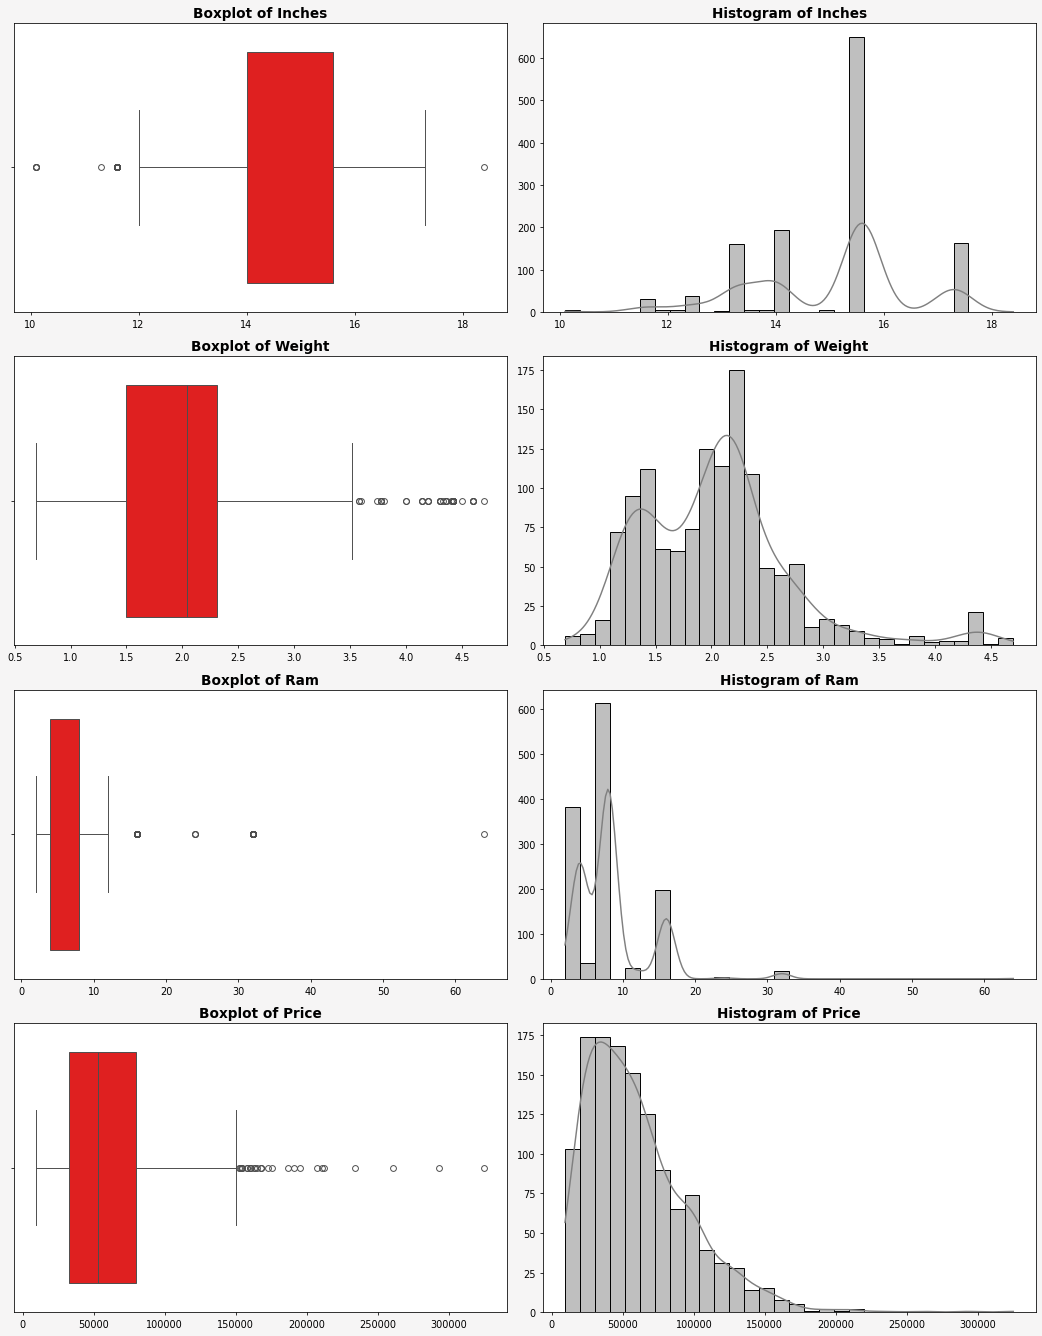

Inches - IQR yöntemiyle aykırı değer yüzdesi: 2.90%
Inches - Z-score yöntemiyle aykırı değer yüzdesi: 0.31%

Weight - IQR yöntemiyle aykırı değer yüzdesi: 3.53%
Weight - Z-score yöntemiyle aykırı değer yüzdesi: 2.59%

Ram - IQR yöntemiyle aykırı değer yüzdesi: 17.19%
Ram - Z-score yöntemiyle aykırı değer yüzdesi: 1.65%

Price - IQR yöntemiyle aykırı değer yüzdesi: 2.20%
Price - Z-score yöntemiyle aykırı değer yüzdesi: 0.94%



In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    return outliers

# Aykırı değerleri belirleme (örnek: Inches)
numerical_columns = ["Inches", "Weight", "Ram", "Price"]

# Create a figure with a specific size
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 20), dpi=70)
fig.patch.set_facecolor('#f6f5f5')

# Loop through columns to create boxplots and histograms
for i, col in enumerate(numerical_columns):
    # Boxplot for outliers
    sns.boxplot(data=df, x=col, ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f"Boxplot of {col}", fontsize=14, fontweight='bold', color='black')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')

    # Histogram for distribution with gray bars
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 1], color='gray')
    axes[i, 1].set_title(f"Histogram of {col}", fontsize=14, fontweight='bold', color='black')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    


# Adjust layout to avoid overlap and ensure readability
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# Aykırı değerlerin yüzdesini gösterme
for col in numerical_columns:
    iqr_outliers = detect_outliers_iqr(df, col)
    zscore_outliers = detect_outliers_zscore(df, col)
    print(f"{col} - IQR yöntemiyle aykırı değer yüzdesi: {iqr_outliers.mean() * 100:.2f}%")
    print(f"{col} - Z-score yöntemiyle aykırı değer yüzdesi: {zscore_outliers.mean() * 100:.2f}%\n")


---

- In the analysis, the RAM variable has the most outliers. 📊
- The other continuous variables (Inches, Weight, Price) have approximately the same number of outliers. ⚖️

- We used the Z-score method to detect outliers, thus reducing the number of outliers in the data. 🔍📉

---

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal

<div class="alert alert-block alert-success">

### <span style=" color:red"> Distribution of Price:

- Create a histogram or box plot to visualize the price distribution.

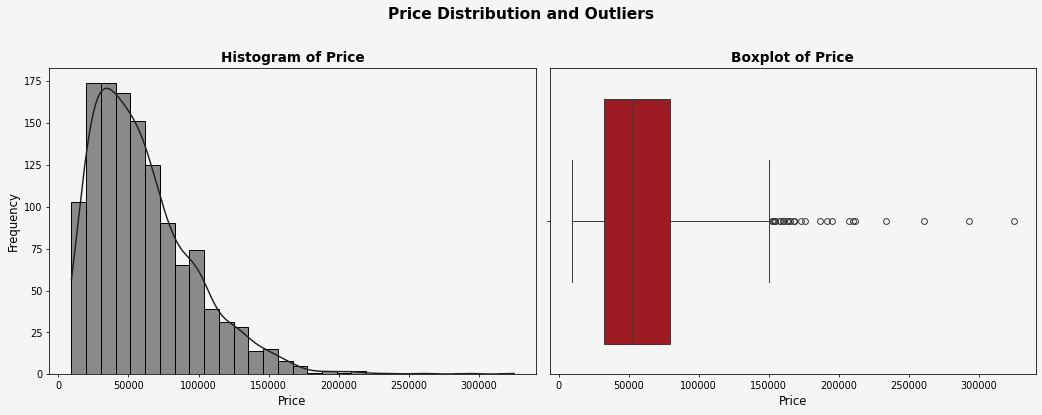

In [34]:
# Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=70)

# Set background color
fig.patch.set_facecolor('#f6f5f5')
axes[0].set_facecolor('#f6f5f5')
axes[1].set_facecolor('#f6f5f5')

# Histogram - Fiyat dağılımını gösterir
sns.histplot(df['Price'], bins=30, kde=True, ax=axes[0], color='#221f1f')
axes[0].set_title("Histogram of Price", fontsize=14, fontweight='bold', color='black')
axes[0].set_xlabel("Price", fontsize=12, color='black')
axes[0].set_ylabel("Frequency", fontsize=12, color='black')

# Boxplot - Fiyatın aykırı değerlerini vurgular
sns.boxplot(data=df, x='Price', ax=axes[1], color='#b20710')
axes[1].set_title("Boxplot of Price", fontsize=14, fontweight='bold', color='black')
axes[1].set_xlabel("Price", fontsize=12, color='black')

# Remove grid lines and show plot
for ax in axes:
    ax.grid(False)
    ax.set_facecolor('#f6f5f5')

# Title for both plots
fig.suptitle('Price Distribution and Outliers', fontsize=16, fontweight='bold', color='black')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


---

- As can be seen from the graphs, the distribution of the price variable is skewed to the right. 📉➡️
- The histogram and box plot show that the price variable is mostly concentrated below 50,000 TL, but has a right-skewed distribution with a small number of very high-priced observations. 💰📊

- Outliers are concentrated at prices of 150,000 TL and above, indicating a significant diversity and imbalance in the data set. ⚠️💸

- This may require using metrics that are less affected by outliers, such as the median, during the analysis or handling outliers with a separate strategy. 🧠🔧

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Company-wise Analysis:

- Plot the count of laptops for each company using a bar chart.
- Visualize the average price of laptops for each company.

In [36]:
company_counts = df['Company'].value_counts()

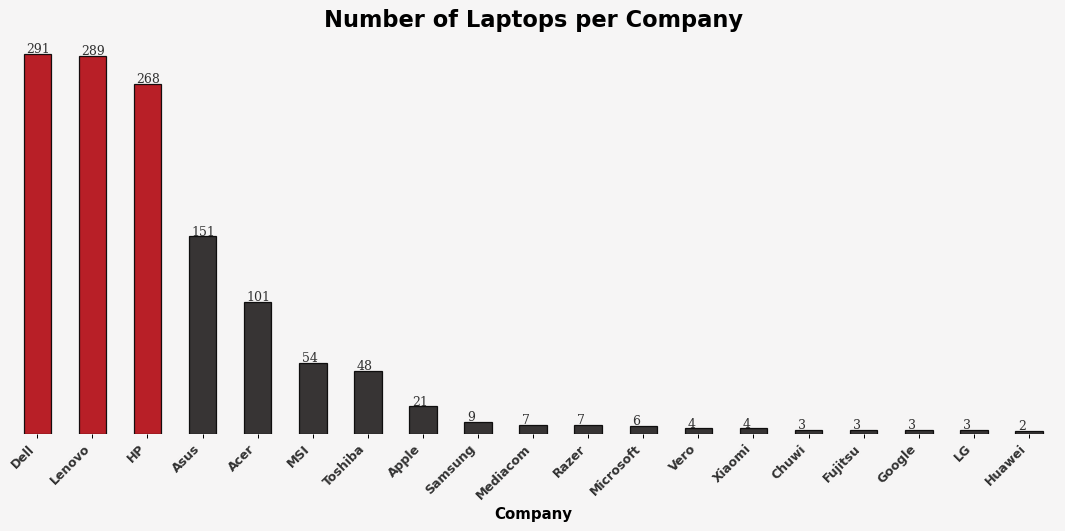

In [37]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=90)
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Set bar colors: First three bars will be red, others will be dark
colors = ['#b20710', '#b20710', '#b20710'] + ['#221f1f'] * (len(company_counts) - 3)

# Plot bar chart with custom colors
company_counts.plot(kind='bar', color=colors, edgecolor='black', ax=ax, alpha=0.9)

# Title and labels
ax.set_title('Number of Laptops per Company', fontsize=18, fontweight='bold', color='black')
ax.set_xlabel('Company', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Number of Laptops', fontsize=12, fontweight='bold', color='black')

# Add text on top of each bar in a similar style as the previous example
for i, value in enumerate(company_counts.values):
    x = i - 0.2
    y = value + 0.5 # Position text slightly above the bar
    ax.text(x, y, str(value), {'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha=0.8)

# Rotate x-ticks and format them
ax.set_xticklabels(company_counts.index, rotation=45, ha='right', fontsize=10, fontweight='bold', color='black', alpha=0.8)

# Remove grid lines and spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

# Hide y-axis ticks
ax.axes.get_yaxis().set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


---

- The chart compares the number of products from different brands. 📊
- Dell, Lenovo and HP are the brands with the largest product variety by far, leading with 291, 289 and 268 products, respectively. 🏆💻
- Asus and Acer stand out with a medium representation (151 and 101 products, respectively), while Apple, Samsung and other brands offer fewer products, falling towards the bottom of the chart. 🍏📱

- Especially Huawei, LG and similar brands are represented with a limited number of products, indicating a narrower product portfolio. 🛒🔻

---

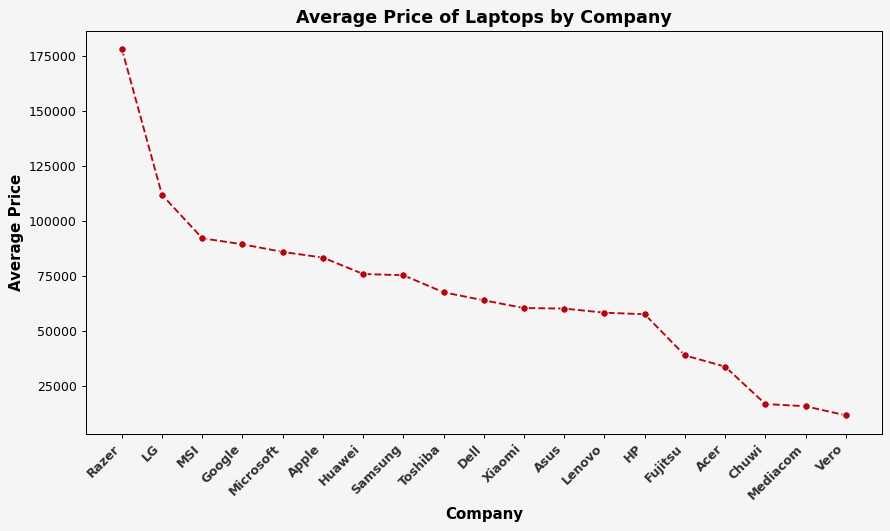

In [74]:
# Calculate average price per company
company_avg_price = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=90)
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Line plot with customized style and red line color
sns.lineplot(x=company_avg_price.index, y=company_avg_price.values, marker='o', color='#b20710', linestyle='--', ax=ax)

# Title and labels
ax.set_title("Average Price of Laptops by Company", fontsize=14, fontweight='bold', color='black')
ax.set_xlabel("Company", fontsize=12, fontweight='bold', color='black')
ax.set_ylabel("Average Price", fontsize=12, fontweight='bold', color='black')
# Rotate x-ticks and format them
ax.set_xticklabels(company_avg_price.index, rotation=45, ha='right', fontsize=10, fontweight='bold', color='black', alpha=0.8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


---

- The chart shows the average prices of laptops by company. 💻💰
- Razer and LG offer the most expensive laptops with an average price of around 175,000 units. 💸🏆
- MSI, Google, and Microsoft also stand out with their high-priced products. 📊🚀
- In contrast, Vero, Mediacom, and Chuwi are the brands with the lowest average prices and offer affordable options. 💲🛒
- In general, prices vary significantly from brand to brand, with some brands in the premium segment and others in the more affordable category. 🎯💡

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Relationship between Screen Size and Price:

- Create a scatter plot showing the relationship between Inches and Price. 

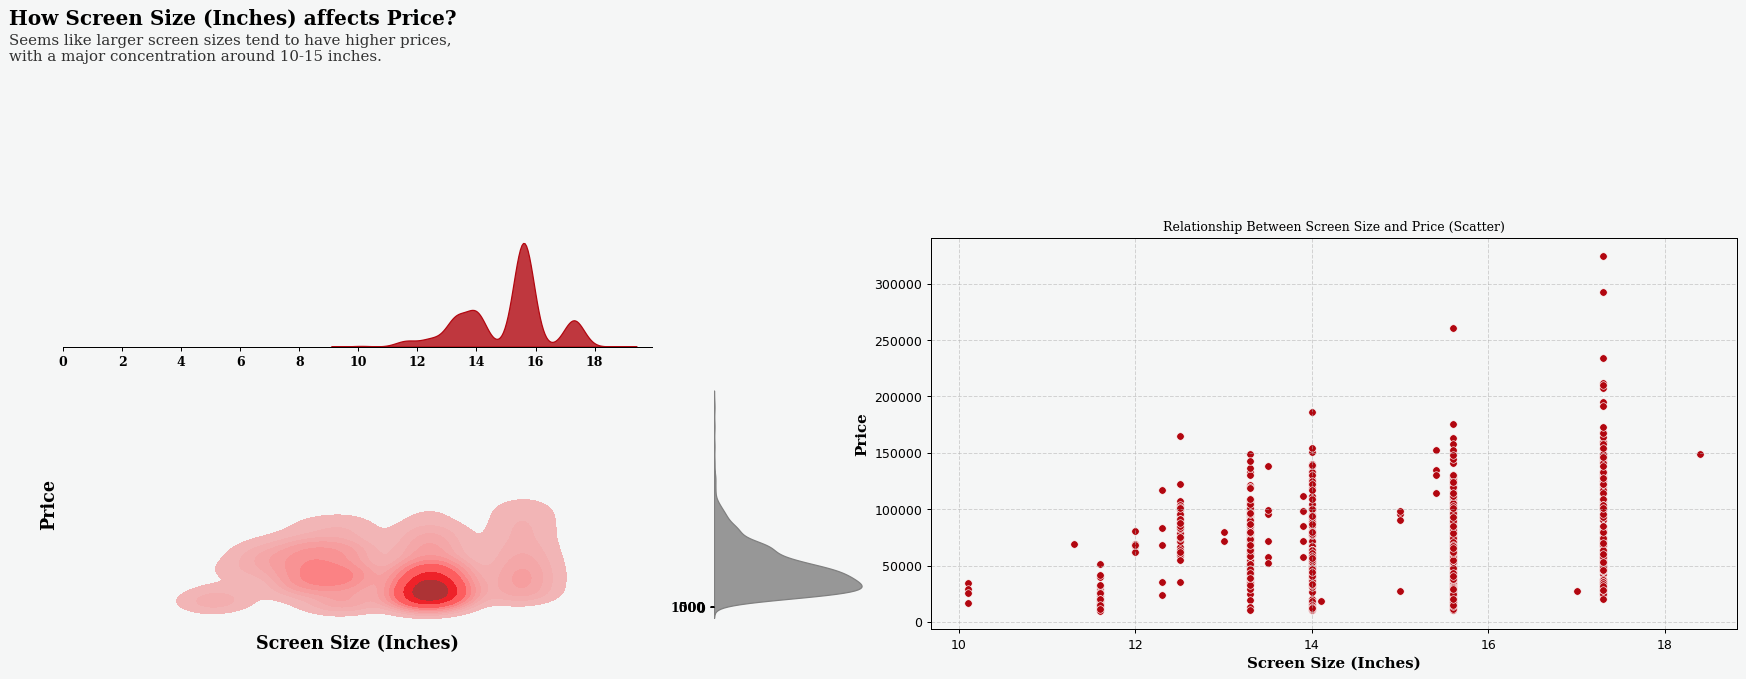

In [41]:
# Create the figure and gridspec layout
fig = plt.figure(figsize=(24, 8), dpi=90)  # Wider figure to accommodate side-by-side plots
fig.patch.set_facecolor('#F5F6F6')
gs = fig.add_gridspec(4, 8)  # Increased columns to 8 for side-by-side layout
gs.update(wspace=0.4, hspace=0.3)

# Create subplots with modified positions - Left side (KDE plots)
ax1 = fig.add_subplot(gs[1, 0:3])  # Top KDE
ax2 = fig.add_subplot(gs[2:, 0:3])  # 2D KDE
ax3 = fig.add_subplot(gs[2:, 3])    # Price KDE

# Create subplot for scatter plot - Right side
ax4 = fig.add_subplot(gs[1:, 4:])   # Scatter plot

# List of axes for easy iteration
axes = [ax1, ax2, ax3, ax4]

# Style settings for KDE plots
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('#F5F6F6')
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

# Restore necessary axes
ax2.axes.get_xaxis().set_visible(True)
ax2.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax3.axes.get_yaxis().set_visible(True)
ax1.spines['bottom'].set_visible(True)

# KDE Plots
sns.kdeplot(x='Inches', data=df, ax=ax1, shade=True, color='#B20710', alpha=0.8)
sns.kdeplot(y='Price', data=df, ax=ax3, shade=True, color='grey', alpha=0.8)
sns.kdeplot(x='Inches', y='Price', data=df, ax=ax2, color='#B20710', shade=True)

# Scatter plot
sns.scatterplot(data=df, x='Inches', y='Price', color='#B20710', ax=ax4)
ax4.grid(linestyle='--', alpha=0.5)
ax4.set_facecolor('#F5F6F6')

# Labels and axis ticks for KDE plots
ax2.set_xlabel('Screen Size (Inches)', {'font': 'serif', 'size': 14, 'weight': 'bold'})
ax2.set_ylabel('Price', {'font': 'serif', 'size': 14, 'weight': 'bold'})
ax3.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xticks(ticks=[])
ax2.set_yticks(ticks=[])

# X and Y ticks for KDE plots
ax1.set_xticks(ticks=np.arange(0, 20, 2))
ax1.set_xticklabels(np.arange(0, 20, 2), **{'font': 'serif', 'size': 10, 'weight': 'bold'})
ax3.set_yticks(ticks=np.arange(0, 1500, 500))
ax3.set_yticklabels(np.arange(0, 1500, 500), **{'font': 'serif', 'size': 10, 'weight': 'bold'})

# Labels for scatter plot
ax4.set_title('Relationship Between Screen Size and Price (Scatter)', 
              fontsize=14, fontweight='bold', font='serif')
ax4.set_xlabel('Screen Size (Inches)', fontsize=12, fontweight='bold', font='serif')
ax4.set_ylabel('Price', fontsize=12, fontweight='bold', font='serif')

# Add text annotations at the top
fig.text(0.1, 0.95, 'How Screen Size (Inches) affects Price?', 
         {'font': 'serif', 'size': 16, 'weight': 'bold'})
fig.text(0.1, 0.90, 'Seems like larger screen sizes tend to have higher prices,\nwith a major concentration around 10-15 inches.',
         {'font': 'serif', 'size': 12, 'weight': 'normal'}, alpha=0.8)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

---

- 10-15 inch screen size is the most popular and price-variable segment. 💻📏
- Larger screen sizes (16 inches and above) significantly increase prices. 📈💰

- While screen size is an important factor in price increases, there are some exceptions that pricing is also affected by other factors such as brand and hardware. 🏷️⚙️

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM vs Price Analysis:

- Use a bar plot or scatter plot to analyze how Ram affects Price.

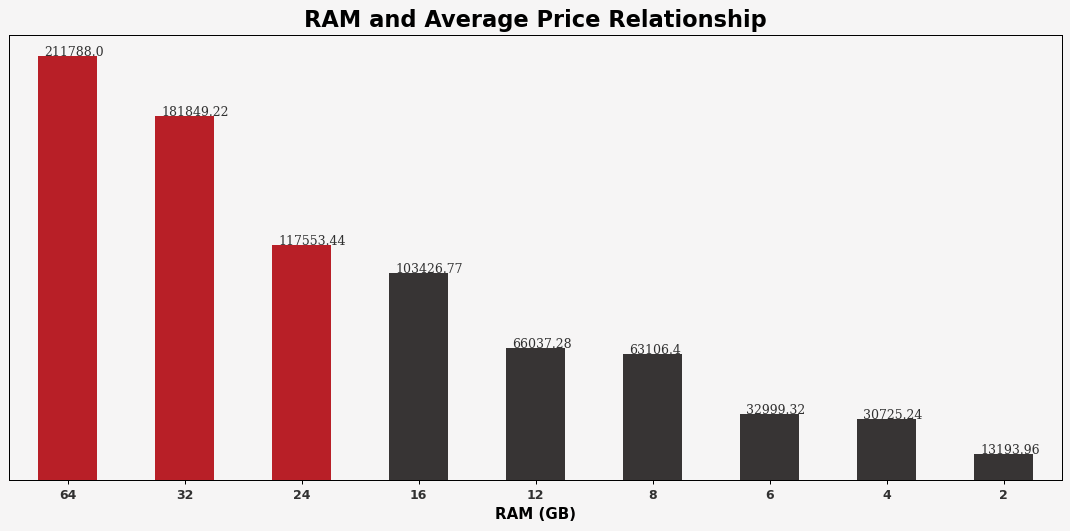

In [43]:
# Assuming 'ram_vs_price' is already defined as in your original code
ram_vs_price = df.groupby('Ram')['Price'].mean().sort_index()
# Sort the data by RAM values to ensure the bars are ordered left to right
ram_vs_price = ram_vs_price.sort_index(ascending = False)

# Create the plot with the specific style
fig, ax = plt.subplots(figsize=(12, 6), dpi=90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# Set bar colors: First three bars will be black, others will be red
colors = ['#b20710', '#b20710', '#b20710'] + ['#221f1f'] * (len(company_counts) - 3)

# Plot the bar chart
ram_vs_price.plot(kind='bar', color=colors, edgecolor='none', ax=ax, alpha=0.9)

# Title and labels
ax.set_title('RAM and Average Price Relationship', fontsize=18, fontweight='bold', color='black')
ax.set_xlabel('RAM (GB)', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Average Price', fontsize=12, fontweight='bold', color='black')

# Add text on top of each bar
for i, value in enumerate(ram_vs_price.values):
    x = i - 0.2
    y = value + 0.5  # Position text slightly above the bar
    ax.text(x, y, str(round(value, 2)), {'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha=0.8)

# Rotate x-ticks and format them
ax.set_xticklabels(ram_vs_price.index, rotation=0, fontsize=10, fontweight='bold', color='black', alpha=0.8)

# Remove grid lines and spines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove y-axis ticks
ax.axes.get_yaxis().set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


---

- Higher RAM capacity significantly increases the average price. 🔋💸
- Especially 64 GB and 32 GB RAM are seen in high-end devices and have the highest prices. 💻🚀

- 8 GB and below RAM capacity is associated with more economical prices and appeals to entry-level users. 🛒🎯

- This relationship shows that RAM capacity is an important factor in determining the price of the device. 📊⚙️

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Operating System Market Share:

- Create a pie chart or bar chart to show the distribution of laptops by OpSys.

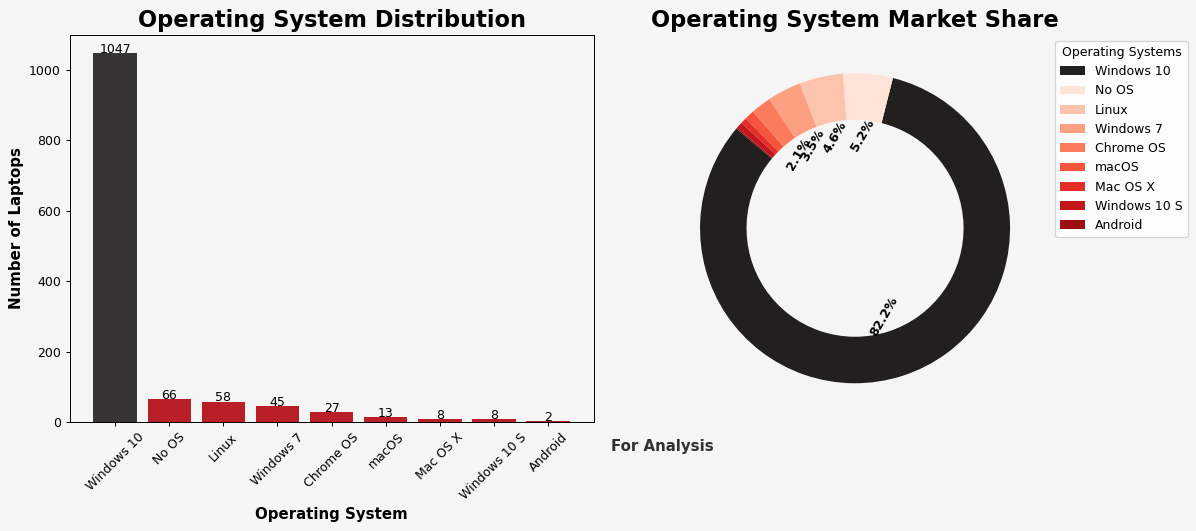

In [45]:
os_counts = df['OpSys'].value_counts()

# Grafik boyutu ve düzen
fig, axs = plt.subplots(1, 2, figsize=(14, 6), dpi=90)
fig.patch.set_facecolor('#f6f5f5')

# Bar grafiği
colors = ['#221f1f'] + ['#b20710'] * (len(os_counts) - 1)  # İlk çubuk siyah, diğerleri kırmızı
axs[0].bar(os_counts.index, os_counts.values, color=colors, edgecolor='none', alpha=0.9)
axs[0].set_facecolor('#f6f5f5')
axs[0].set_title('Operating System Distribution', fontsize=18, fontweight='bold', color='black')
axs[0].set_xlabel('Operating System', fontsize=12, fontweight='bold', color='black')
axs[0].set_ylabel('Number of Laptops', fontsize=12, fontweight='bold', color='black')
axs[0].tick_params(axis='x', labelrotation=45, labelsize=10, colors='black')

# Çubuk üstü değer yazma
for i, value in enumerate(os_counts.values):
    axs[0].text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

# Pasta grafiği
largest_index = os_counts.idxmax()  # En büyük dilimin indeksi
colors_pie = ['#221f1f' if idx == largest_index else plt.cm.Reds(i / len(os_counts)) 
              for i, idx in enumerate(os_counts.index)]

# Yüzdeleri düzgün yerleştirmek için `autopct` kullanımı
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 2 else ''  # Küçük dilimlerde yüzdeleri yazmamak için

wedges, texts, autotexts = axs[1].pie(
    os_counts, 
    labels=None, 
    startangle=140, 
    colors=colors_pie,
    wedgeprops={'width': 0.3}, 
    autopct=autopct_format,
    textprops={'color': 'black', 'fontsize': 10}
)

# Yüzdeler daha düzgün yerleşsin diye hizalama
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
    autotext.set_rotation(60)

axs[1].set_facecolor('#f6f5f5')
axs[1].set_title('Operating System Market Share', fontsize=18, fontweight='bold', color='black')

# Pasta grafiği için açıklama
axs[1].legend(labels=os_counts.index, title='Operating Systems', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

fig.text(0.57, 0.15, 'For Analysis', ha='right', va='bottom', fontsize=12, color='black', fontweight='bold', alpha=0.8)

# Yerleşimi sıkıştırma
plt.tight_layout()

# Grafik gösterimi
plt.show()


---

- Windows 10 is unquestionably the dominant and most widespread operating system on the market. 💻👑
- Linux, No OS and Windows 7, an older version, are still preferred by a certain user base, but they are far behind Windows 10. 🐧📉

- Alternative operating systems such as macOS and Android have very low usage rates and appeal to a niche audience. 🍏🤖

- The overall picture clearly shows the dominant position of Windows-based systems in the laptop market. 🏆🖥️

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Weight Distribution:

- Plot a histogram to analyze the weight distribution of laptops.

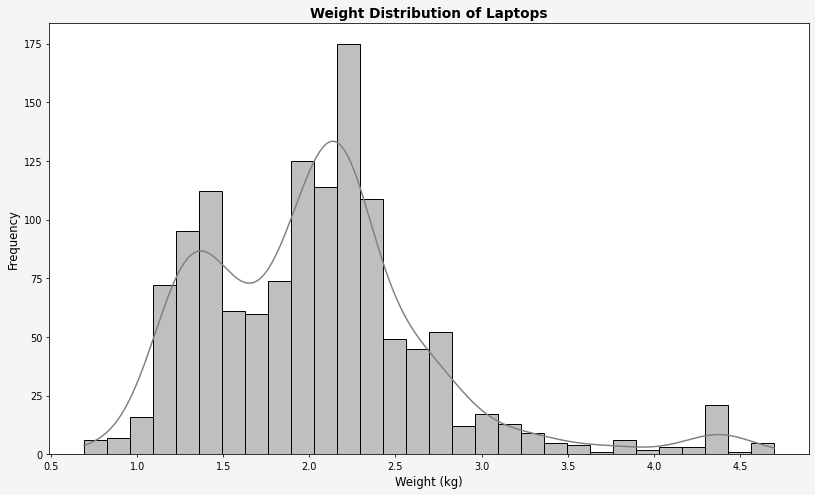

In [47]:
# Create a figure with specific size and DPI
plt.figure(figsize=(14, 8), dpi=70)

# Set background color
plt.gcf().patch.set_facecolor('#f6f5f5')

# Create histogram with KDE and customized appearance
sns.histplot(df['Weight'], bins=30, kde=True, color='gray', edgecolor='black')

# Set title and axis labels with specific fonts and colors
plt.title('Weight Distribution of Laptops', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Weight (kg)', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')

# Remove grid
plt.grid(False)

# Show the plot
plt.show()


---

- The vast majority of laptops are concentrated between 1.5 and 2.5 kg, which is ideal for portability. 💻⚖️
- Lighter or heavier devices may be designed for more specific needs. 🏋️🪶

- This analysis shows that users generally prefer devices in the mid-weight segment. 📊🎯

---

In [49]:
df.Weight.mean()

np.float64(2.040400313971743)

In [50]:
df.Weight.median()

np.float64(2.04)

In [51]:
import numpy as np
from scipy.stats import skew
# Çarpıklık hesaplama
skewness = skew(df.Weight)

print(f"Çarpıklık (Skewness): {skewness}")

Çarpıklık (Skewness): 1.1496261365433234


---

### General Distribution:
- The histogram shows which weight ranges laptops are mostly concentrated in. 📊

- For example:
- Most devices may be concentrated between 1.5 kg and 2.5 kg. 💻⚖️

- Outliers:
- Extremely light (e.g. less than 1 kg) or extremely heavy (e.g. more than 4 kg) devices can be observed at the extreme points in the histogram. 🏋️🔻

- Although the distribution seems symmetrical when the mean and median values ​​are considered, it can be said to be skewed to the right according to the skew function. ↗️📉

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Price Correlation Analysis:

- Compute and visualize the correlation between numerical columns (Inches, Weight, Ram, etc.) and Price.

In [52]:
correlation_matrix = df[['Inches', 'Weight', 'Ram', 'Price']].corr()

print("Korelasyon Matrisi:")
print(correlation_matrix)


Korelasyon Matrisi:
          Inches    Weight       Ram     Price
Inches  1.000000  0.826634  0.241441  0.066990
Weight  0.826634  1.000000  0.389658  0.212192
Ram     0.241441  0.389658  1.000000  0.740106
Price   0.066990  0.212192  0.740106  1.000000


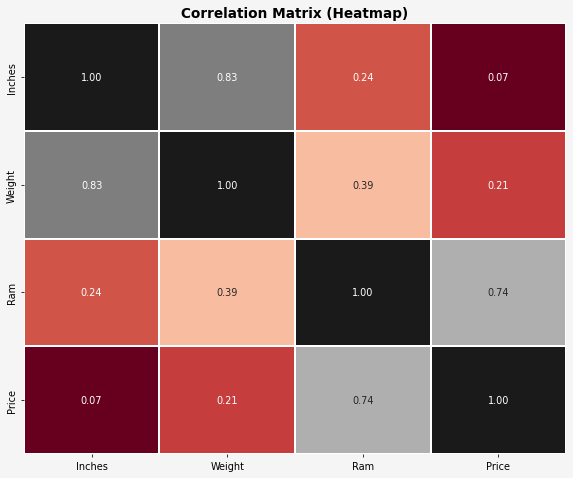

In [53]:
# Create a figure with specific size and DPI
plt.figure(figsize=(10, 8), dpi=70)

# Set background color for the figure
plt.gcf().patch.set_facecolor('#f6f5f5')

# Create the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='RdGy', fmt=".2f", 
            linewidths=0.5, cbar=False)

# Set title and labels with specific fonts and colors
plt.title('Correlation Matrix (Heatmap)', fontsize=14, fontweight='bold', color='black')

# Set the background color for the axes (plot area)
plt.gca().set_facecolor('#f6f5f5')

# Show the plot
plt.show()


---

### Variables on the Image
#### Inches vs. Other Variables:
- There is a strong positive correlation of 0.83 between "Inches" (presumably the screen size) and "Weight". 📏➕⚖️
- This suggests that devices with larger screens tend to be heavier.
- There is a weaker correlation between "Inches" and other variables (for example, a low correlation of 0.07 with "Price"). 💻💲
#### Weight vs. Other Variables:
- There is a strong correlation between "Weight" and "Inches" (0.83). 📊
- There are weaker positive correlations between "Weight" and "Ram" and "Price" (0.39 and 0.21 respectively). 🔋💸
#### Ram vs Other Variables:
- There is a strong positive correlation between "Ram" and "Price" (0.74). 💾➕💰
#### This shows that devices with higher RAM are generally more expensive.
- There are weaker correlations between "Ram" and other variables.
#### Price vs Other Variables:
- There is a strong positive correlation between "Price" and "Ram" (0.74). 💲➕🔋
- There are very weak correlations between "Price" and "Inches" and "Weight" (0.07 and 0.21 respectively). 📉
#### Result
- The image shows that the strongest correlation between the variables is between "Ram" and "Price". 📈
- The positive correlation between "Inches" and "Weight" is also quite noticeable. ⚖️
- Some variables (e.g. "Price" and "Inches") have very weak correlations, indicating that these variables do not affect each other very much. 💡

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> ScreenResolution Impact on Price:

- Analyze how different resolution types (e.g., Full HD, 4K) affect the price.

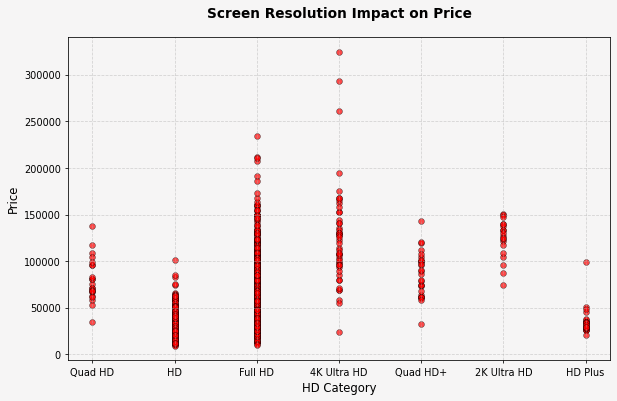

In [54]:
# Create a figure with specific size and DPI
plt.figure(figsize=(10, 6), dpi=70)

# Set background color for the figure
plt.gcf().patch.set_facecolor('#f6f5f5')

# Create the scatter plot with red points
sns.scatterplot(x='HD_Category', y='Price', data=df, alpha=0.7, color='red', edgecolor='black')

# Set title and axis labels with specific fonts and colors
plt.title('Screen Resolution Impact on Price', fontsize=14, fontweight='bold', color='black', pad=20)
plt.xlabel('HD Category', fontsize=12, color='black')
plt.ylabel('Price', fontsize=12, color='black')

# Remove gridlines and set a soft grid style
plt.grid(linestyle='--', alpha=0.5)

# Set background color for the axes (plot area)
plt.gca().set_facecolor('#f6f5f5')

# Show the plot
plt.show()


---

### Screen Resolutions and Price Relationship
- 4K Ultra HD is generally associated with the highest prices, with prices going up to 300,000 units. 💎📺
- This represents the most expensive and premium segment of devices.

- Full HD is the most common resolution category, with prices concentrated in the 50,000 - 100,000 range. 📊🎯

- Quad HD and 2K Ultra HD are associated with slightly higher prices than Full HD, but not as high as 4K Ultra HD. 🔍💲

- HD and HD Plus represent the budget segment, with prices concentrated under 50,000 units. 💻💵

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Top CPU/GPU Manufacturers:

- Extract and visualize the most common CPU and GPU manufacturers.

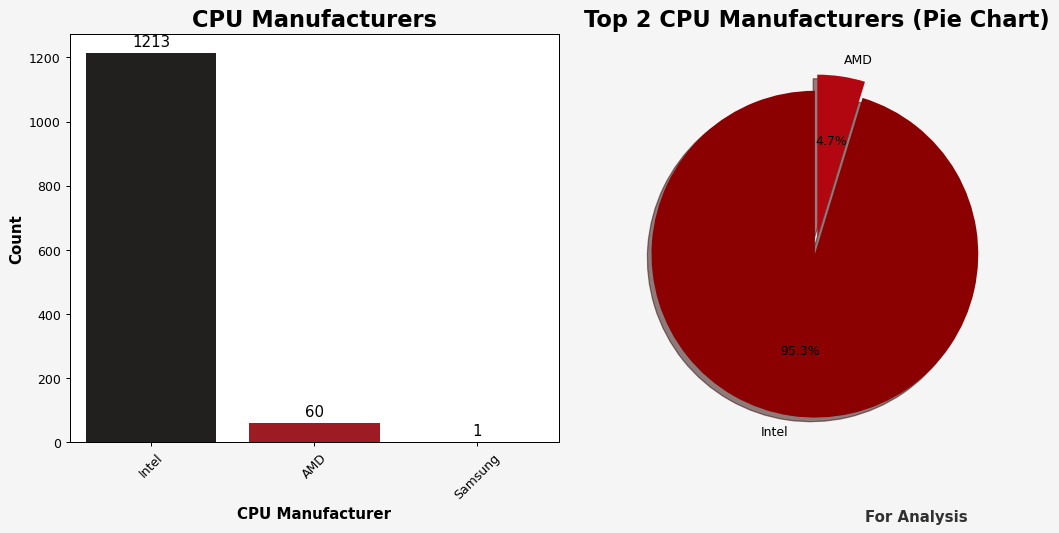

In [56]:
# CPU üreticilerinin verisini hazırlama
cpu_manufacturers = df['Cpu_Manufacturer'].value_counts().reset_index()
cpu_manufacturers.columns = ['CPU Manufacturer', 'Count']  
cpu_manufacturers_top2 = cpu_manufacturers.head(2)

# Grafik boyutu ve düzen
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=90)
fig.patch.set_facecolor('#f6f5f5')

# 1. Grafik: Bar Plot
sns.barplot(x='CPU Manufacturer', y='Count', data=cpu_manufacturers, palette=['#221f1f'] + ['#b20710'] * (len(cpu_manufacturers) - 1), ax=axes[0])
axes[0].set_title('CPU Manufacturers', fontsize=18, fontweight='bold', color='black')
axes[0].set_xlabel('CPU Manufacturer', fontsize=12, fontweight='bold', color='black')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold', color='black')
axes[0].tick_params(axis='x', rotation=45, labelsize=10, colors='black')

# Çubuk üzerindeki yazıları düzenleme
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 9), textcoords='offset points')

# 2. Grafik: Pie Chart (Top 2 CPU Üreticileri)
cpu_explode = [0.1 if i == cpu_manufacturers_top2['Count'].idxmax() else 0 for i in range(len(cpu_manufacturers_top2))]
axes[1].pie(cpu_manufacturers_top2['Count'], labels=cpu_manufacturers_top2['CPU Manufacturer'], 
            shadow=True, autopct='%1.1f%%', startangle=90, explode=cpu_explode, 
            colors=['#8b0000', '#b20710'], textprops={'color': 'black'})  # Yer değiştirilmiş kırmızı tonları

axes[1].set_title('Top 2 CPU Manufacturers (Pie Chart)', fontsize=18, fontweight='bold', color='black')

# Sağ alt köşeye metin ekleme
fig.text(0.9, 0.02, 'For Analysis', ha='right', va='bottom', fontsize=12, color='black', fontweight='bold', alpha=0.8)

# Grafik yerleşimini sıkıştırma
plt.tight_layout()

# Grafik gösterimi
plt.show()

---

### Processor Manufacturers and Market Share
- Intel completely dominates the laptop processor market 🏆, leading both in number of devices and market share. 🔧💻

- AMD continues to exist as an alternative manufacturer 🔄, but has a very limited usage rate compared to Intel. ⚙️📉

- Other manufacturers such as Samsung have almost negligible market share. 📉📊

---

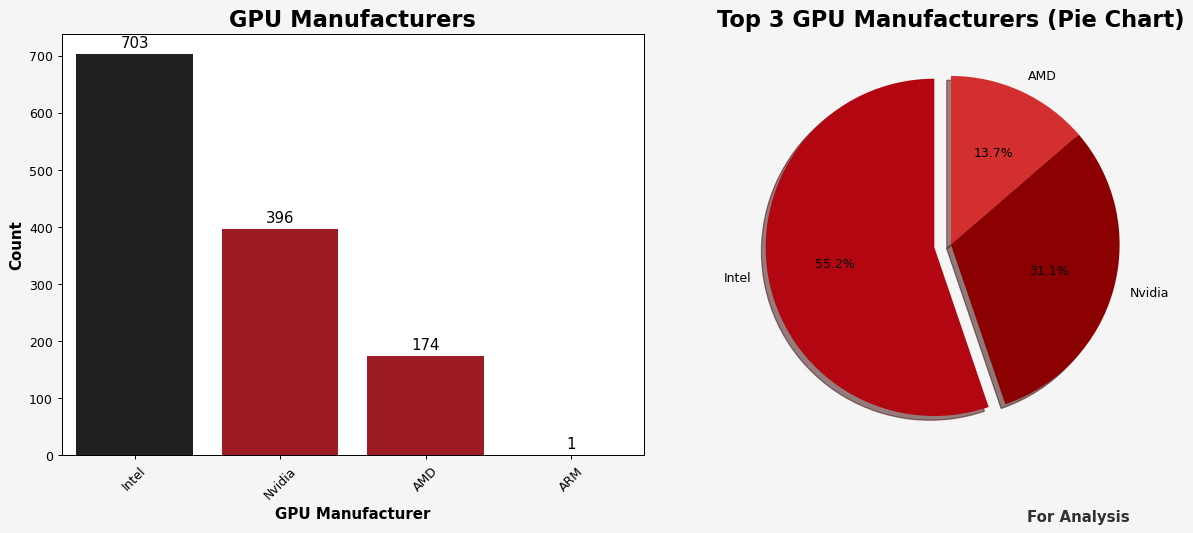

In [58]:
# GPU üreticilerinin verisini hazırlama
gpu_manufacturers = df['Gpu_Manufacturer'].value_counts().reset_index()
gpu_manufacturers.columns = ['GPU Manufacturer', 'Count']  
gpu_manufacturers_top3 = gpu_manufacturers.head(3)

# Grafik boyutu ve düzen
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=90)
fig.patch.set_facecolor('#f6f5f5')

# Bar plot: İlk bar siyah olacak şekilde
sns.barplot(x='GPU Manufacturer', y='Count', data=gpu_manufacturers, palette=['#221f1f'] + ['#b20710'] * (len(cpu_manufacturers) - 1), ax=axes[0])
axes[0].set_title('GPU Manufacturers', fontsize=18, fontweight='bold', color='black')
axes[0].set_xlabel('GPU Manufacturer', fontsize=12, fontweight='bold', color='black')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold', color='black')
axes[0].tick_params(axis='x', rotation=45, labelsize=10, colors='black')

# Çubuk üzerindeki yazıları düzenleme
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 9), textcoords='offset points')

# Pie chart for top 3 GPU manufacturers
gpu_explode = [0.1 if i == gpu_manufacturers_top3['Count'].idxmax() else 0 for i in range(len(gpu_manufacturers_top3))]
axes[1].pie(gpu_manufacturers_top3['Count'], labels=gpu_manufacturers_top3['GPU Manufacturer'], 
            shadow=True, autopct='%1.1f%%', startangle=90, explode=gpu_explode, 
            colors=['#b20710', '#8b0000', '#d32f2f'], textprops={'color': 'black'})  # Kırmızı tonları ve siyah yazı

axes[1].set_title('Top 3 GPU Manufacturers (Pie Chart)', fontsize=18, fontweight='bold', color='black')

# Sağ alt köşeye metin ekleme
fig.text(0.9, 0.02, 'For Analysis', ha='right', va='bottom', fontsize=12, color='black', fontweight='bold', alpha=0.8)

# Grafik yerleşimini sıkıştırma
plt.tight_layout()

# Grafik gösterimi
plt.show()


---

### GPU Manufacturers and Market Share
- Intel is the leader in GPU production 🏆 and has the highest market share thanks to the prevalence of integrated graphics units. 🖥️⚡

- Nvidia is in a strong position in the high-performance segment 🚀 and has a significant market share. 🎮🎨

- AMD continues to exist as an alternative option with a smaller market share. 🔧📊

- ARM is a very rare GPU manufacturer. 📉💡

- This chart shows that Intel is dominant for daily use and general needs, while Nvidia is preferred in more performance-oriented devices.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM Analysis:

- Identify the most common RAM configurations and their respective average prices.

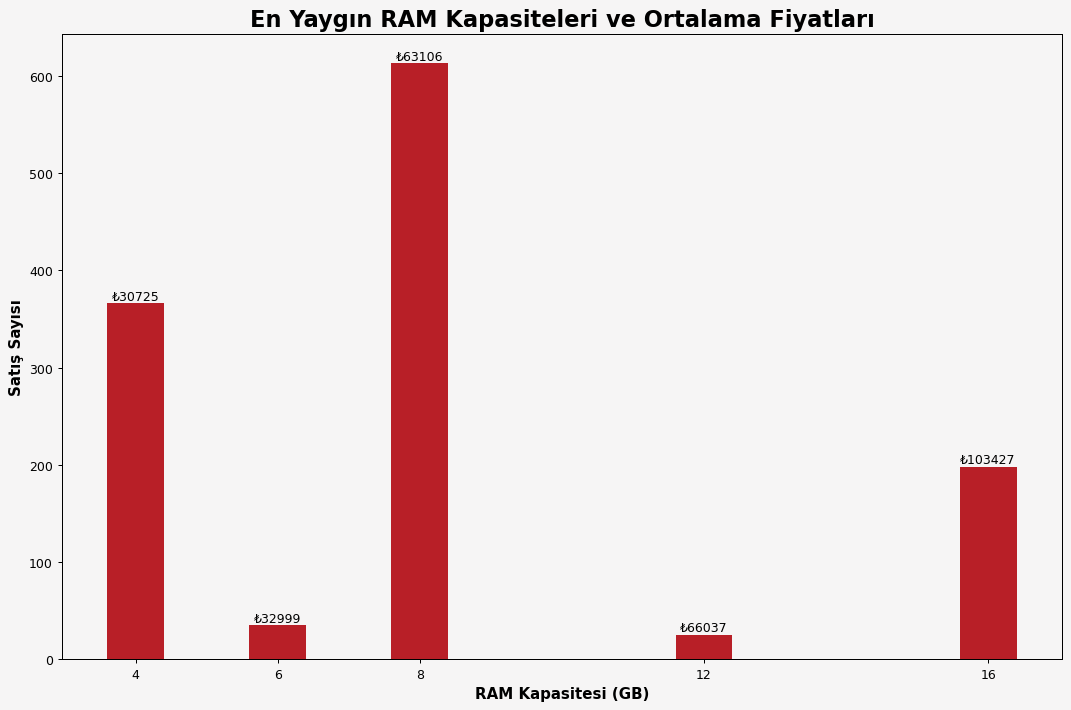

In [60]:
# En yaygın 5 RAM kapasitesini belirleme
top_rams = df['Ram'].value_counts().head(5).index

# Hem frekans hem de ortalama fiyat bilgisi için veri hazırlama
top_rams_data = df[df['Ram'].isin(top_rams)].groupby('Ram').agg(
    frequency=('Ram', 'count'), 
    avg_price=('Price', 'mean')
).reset_index().sort_values(by='frequency', ascending=False)

# Grafik boyutu ve düzen
fig, ax = plt.subplots(figsize=(12, 8), dpi=90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# Bar plot
bars = ax.bar(
    top_rams_data['Ram'], 
    top_rams_data['frequency'], 
    color='#b20710', 
    edgecolor='none', 
    alpha=0.9
)

# Başlık ve eksen etiketleri
ax.set_title('En Yaygın RAM Kapasiteleri ve Ortalama Fiyatları', fontsize=18, fontweight='bold', color='black')
ax.set_xlabel('RAM Kapasitesi (GB)', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Satış Sayısı', fontsize=12, fontweight='bold', color='black')

# Çubuk üzerindeki yazıları düzenleme
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'₺{top_rams_data["avg_price"].iloc[i]:.0f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# X ekseninde yalnızca belirli RAM kapasitelerini göster
ax.set_xticks(top_rams_data['Ram'])
ax.tick_params(axis='x', labelsize=10, colors='black')

# Yerleşimi sıkıştırma
plt.tight_layout()

# Grafik gösterimi
plt.show()


---

### RAM Capacities and Price Segments
- 8 GB RAM is the most popular capacity and 💾 stands out in terms of price-performance. 🔥💰
- 16 GB RAM is in the premium segment and is associated with higher prices. 💎💻
- 4 GB RAM is the most preferred entry-level option for affordable devices. 🏷️📉
- There is generally an inverse relationship between sales volume and price; higher priced RAM capacities are sold less. 📊⬇️

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Memory Type and Price Relationship:

- Analyze the impact of memory type (e.g., HDD, SSD, Hybrid) on the price.

In [62]:
df[df['Memory'] == '8GB SSD']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Touchscreen,HD_Category,GHz,Cpu_Manufacturer,Cpu_Core_Type,Gpu_Manufacturer
950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ,8,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.0,119826.72,1920x1080,No,Full HD,2.7,Intel,i7,Nvidia


In [63]:
df.iloc[950, df.columns.get_loc('Memory')] = '256GB SSD'

In [64]:
df.iloc[950]

Company                                      HP
TypeName                            Workstation
Inches                                     15.6
ScreenResolution    IPS Panel Full HD 1920x1080
Cpu                        Intel Core i7 6820HQ
Ram                                           8
Memory                                256GB SSD
Gpu                        Nvidia Quadro M1000M
OpSys                                Windows 10
Weight                                      2.0
Price                                 119826.72
Resolution                            1920x1080
Touchscreen                                  No
HD_Category                             Full HD
GHz                                         2.7
Cpu_Manufacturer                          Intel
Cpu_Core_Type                                i7
Gpu_Manufacturer                         Nvidia
Name: 950, dtype: object

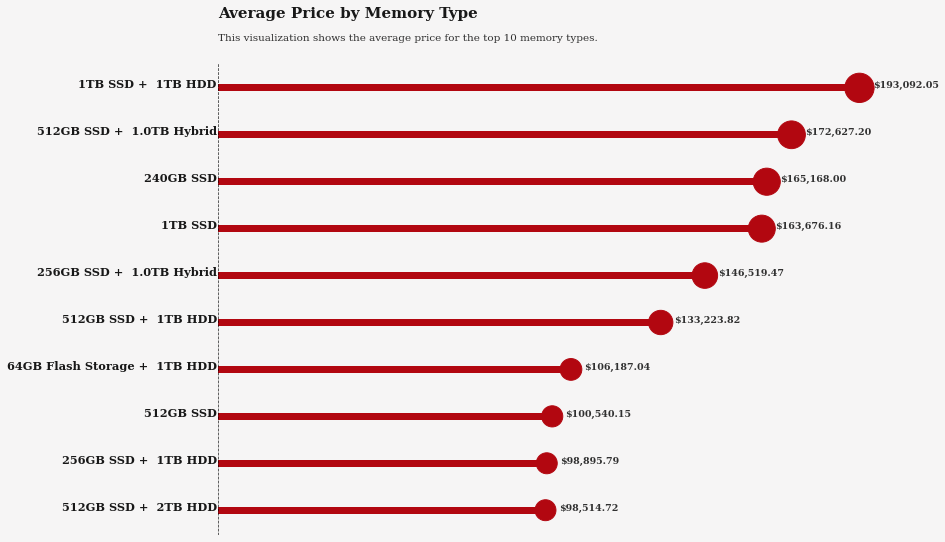

In [65]:
# Kategorilere göre ortalama fiyat hesaplama (MemoryType başına)
avg_prices = df.groupby('Memory')['Price'].mean().reset_index()

# En popüler 10 bellek türünü seçme
avg_prices = avg_prices.sort_values('Price', ascending=False).head(10)

# Fiyata göre sıralama (büyükten küçüğe)
avg_prices = avg_prices.sort_values('Price', ascending=True)

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(14, 8), dpi=68)

# Arka plan renkleri
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# Kırmızı çubuklar
ax.barh(y=avg_prices['Memory'], 
        width=avg_prices['Price'], 
        height=0.15, 
        color='#b20710')

# Kırmızı noktalar (daireler)
ax.scatter(y=avg_prices['Memory'], 
           x=avg_prices['Price'], 
           s=avg_prices['Price']*0.005,  # Nokta boyutunu fiyatla orantılı yapma
           c='#b20710')

# Merkez çizgisi
ax.axvline(x=0, ymin=0, ymax=1, 
           linewidth=0.8, linestyle='--', color='black', alpha=0.8)

# Etiketleri ekleme
for idx, (memory_type, price) in enumerate(zip(avg_prices['Memory'], avg_prices['Price'])):
    # Kategori ismi
    ax.text(-500, idx, memory_type,
            horizontalalignment='right',
            fontsize=12, fontfamily='serif', fontweight='bold',
            color='black', alpha=0.9)
    
    # Fiyat değeri
    ax.text(price +4000, idx, f"${price:,.2f}",
            horizontalalignment='left',
            fontsize=10, fontfamily='serif', fontweight='bold',
            color='black', alpha=0.8)

# Çerçeve ve eksenleri kaldırma
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# X ekseni sınırları
max_price = max(avg_prices['Price'])
ax.set_xlim([0, max_price + 5000])

# Başlık ve alt başlık
ax.text(0, len(avg_prices) + 0.5, 'Average Price by Memory Type',
        fontsize=16, fontfamily='serif', fontweight='bold',
        color='black', alpha=0.9)
ax.text(0, len(avg_prices), 'This visualization shows the average price for the top 10 memory types.',
        fontsize=11, fontfamily='serif', color='black', alpha=0.8)

plt.tight_layout()
plt.show()

---

### Storage Types and Price Relationship
- SSD and HDD combinations, especially with high storage capacities, are the most expensive options. 💾💸
- A single SSD type (for example, 1TB SSD) has a high price compared to more economical options. 💻💰
- 512GB SSD + 2TB HDD offers a more affordable option in terms of price-performance. ⚖️📈
- High-capacity hybrid storage types significantly increase prices. 📊💡
- This analysis clearly shows that storage capacity and types have a significant impact on prices. 💡📉

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> High-end Laptop Analysis:

- Define a "high-end" laptop (e.g., based on Price or specs) and analyze their characteristics.

In [67]:
# Define a "high-end" laptop
high_end_price_threshold = 80000  # You can adjust this based on your dataset
high_end_laptops = df[df['Price'] > high_end_price_threshold]

# Characteristics of high-end laptops
high_end_laptops_characteristics = high_end_laptops[['Touchscreen', 'HD_Category', 'GHz', 'Cpu_Manufacturer', 'Cpu_Core_Type', 'Gpu_Manufacturer', 'Ram']]

# Analyze frequency of each characteristic
high_end_analysis = high_end_laptops_characteristics.describe(include='all')

# Example: Get the most common characteristics
common_touchscreen = high_end_laptops['Touchscreen'].value_counts()
common_hd_category = high_end_laptops['HD_Category'].value_counts()
common_cpu_manufacturer = high_end_laptops['Cpu_Manufacturer'].value_counts()
common_gpu_manufacturer = high_end_laptops['Gpu_Manufacturer'].value_counts()
common_ram = high_end_laptops['Ram'].value_counts()

# Display the analysis results
#print("High-End Laptop Characteristics Analysis:")
#print("Touchscreen Distribution: ", common_touchscreen)
#print("HD Category Distribution: ", common_hd_category)
#print("CPU Manufacturer Distribution: ", common_cpu_manufacturer)
#print("GPU Manufacturer Distribution: ", common_gpu_manufacturer)
#print("RAM Distribution: ", common_ram)

# Show high-end laptops data
high_end_laptops.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Touchscreen,HD_Category,GHz,Cpu_Manufacturer,Cpu_Core_Type,Gpu_Manufacturer
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,No,4K Ultra HD,2.7,Intel,i7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,No,Quad HD,3.1,Intel,i5,Intel
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,2880x1800,No,4K Ultra HD,2.2,Intel,i7,Intel
12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,256GB SSD,AMD Radeon Pro 555,macOS,1.83,130001.6016,2880x1800,No,4K Ultra HD,2.8,Intel,i7,AMD
15,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,80908.3440,2560x1600,No,Quad HD,2.3,Intel,i5,Intel


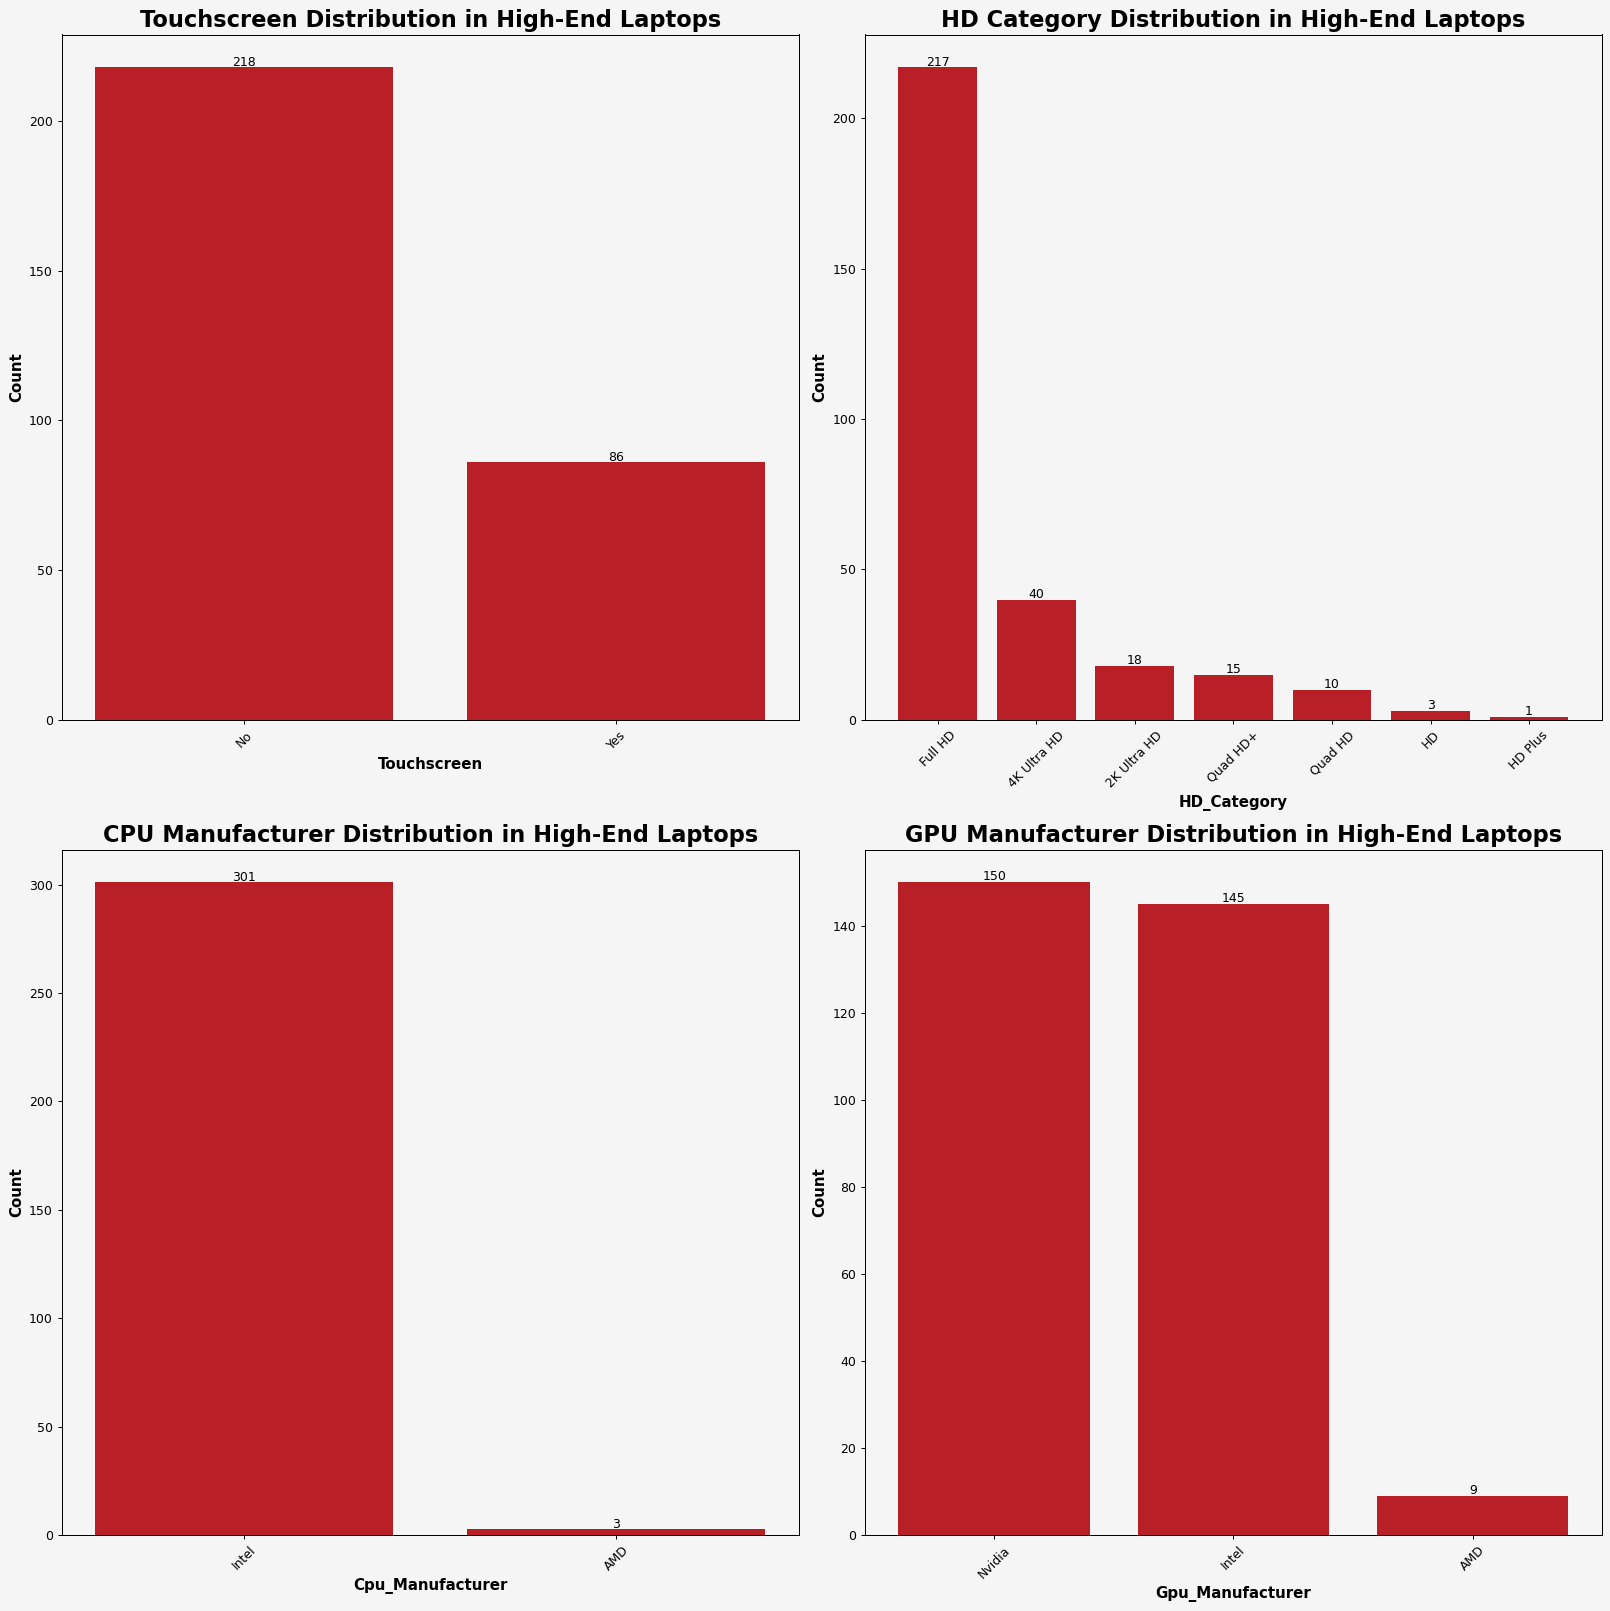

In [68]:
# Grafik boyutu ve düzen
fig, axs = plt.subplots(2, 2, figsize=(18, 18), dpi=90)
fig.patch.set_facecolor('#f6f5f5')

# Veriler ve başlıklar
data_and_titles = [
    (common_touchscreen, "Touchscreen Distribution in High-End Laptops"),
    (common_hd_category, "HD Category Distribution in High-End Laptops"),
    (common_cpu_manufacturer, "CPU Manufacturer Distribution in High-End Laptops"),
    (common_gpu_manufacturer, "GPU Manufacturer Distribution in High-End Laptops"),
   
]

# Grafik çizimi
for ax, (data, title) in zip(axs.flat, data_and_titles):
    ax.bar(data.index, data.values, color='#b20710', edgecolor='none', alpha=0.9)
    ax.set_facecolor('#f6f5f5')
    ax.set_title(title, fontsize=18, fontweight='bold', color='black')
    ax.set_xlabel(data.index.name if data.index.name else '', fontsize=12, fontweight='bold', color='black')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold', color='black')
    ax.tick_params(axis='x', labelrotation=45, labelsize=10, colors='black')
    
    # Çubuk üstü değer yazma
    for i, value in enumerate(data.values):
        ax.text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

# Boş eksenleri kaldır
if len(data_and_titles) < len(axs.flat):
    for ax in axs.flat[len(data_and_titles):]:
        ax.axis('off')

# Yerleşimi sıkıştırma
plt.tight_layout()

# Grafik gösterimi
plt.show()


---

### 📱🔧 Technological Features and Market Trends
- Touchscreen: Standard screens are preferred. Touchscreen usage is relatively low in the high-end segment.
- Screen resolution: While Full HD is the most common resolution, 4K Ultra HD is quite popular in premium devices.
- CPU: Intel is completely dominant in high-end devices. AMD's presence is quite limited.
- GPU: While NVIDIA is the leader in high-performance graphics units, Intel is a strong alternative in integrated graphics.

---

In [69]:
df.Price.describe()

count      1274.000000
mean      60503.185074
std       37333.222977
min        9270.720000
25%       32495.605200
50%       52693.920000
75%       79773.480000
max      324954.720000
Name: Price, dtype: float64

<div class="alert alert-block alert-success">

### <span style=" color:red"> TypeName Analysis:

- Explore the distribution of TypeName and its relationship with price (e.g., Gaming vs Ultrabook).

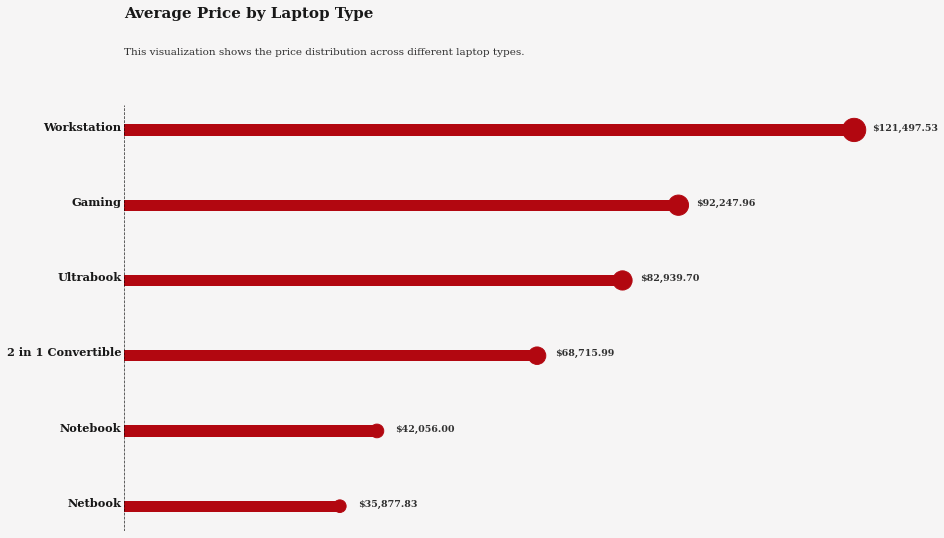

In [70]:
# Kategorilere göre ortalama fiyat hesaplama
avg_prices2 = df.groupby('TypeName')['Price'].mean().reset_index()

# Fiyata göre sıralama (büyükten küçüğe)
avg_prices2 = avg_prices2.sort_values('Price', ascending=True)

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(14, 8), dpi=68)

# Arka plan renkleri
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# Kırmızı çubuklar
ax.barh(y=avg_prices2['TypeName'], 
        width=avg_prices2['Price'], 
        height=0.15, 
        color='#b20710')

# Kırmızı noktalar (daireler)
# Nokta boyutunu fiyatla orantılı yapma (0.1 faktörünü verilerinize göre ayarlayabilirsiniz)
ax.scatter(y=avg_prices2['TypeName'], 
          x=avg_prices2['Price'], 
          s=avg_prices2['Price']*0.005,  # nokta boyutunu fiyatla orantılı yapma
          c='#b20710')

# Merkez çizgisi
ax.axvline(x=0, ymin=0, ymax=1, 
          linewidth=0.8, linestyle='--', color='black', alpha=0.8)

# Etiketleri ekleme
for idx, (type_name, price) in enumerate(zip(avg_prices2['TypeName'], avg_prices2['Price'])):
    # Kategori ismi
    ax.text(-500, idx, type_name,
            horizontalalignment='right',
            fontsize=12, fontfamily='serif', fontweight='bold',
            color='black', alpha=0.9)
    
    # Fiyat değeri
    ax.text(price + 3000, idx, f"${price:,.2f}",
            horizontalalignment='left',
            fontsize=10, fontfamily='serif', fontweight='bold',
            color='black', alpha=0.8)

# Çerçeve ve eksenleri kaldırma
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# X ekseni sınırları
max_price = max(avg_prices2['Price'])
ax.set_xlim([0, max_price + 5000])

# Başlık ve alt başlık
ax.text(0, len(avg_prices2) + 0.5, 'Average Price by Laptop Type',
        fontsize=16, fontfamily='serif', fontweight='bold',
        color='black', alpha=0.9)
ax.text(0, len(avg_prices2), 'This visualization shows the price distribution across different laptop types.',
        fontsize=11, fontfamily='serif', color='black', alpha=0.8)

plt.tight_layout()
plt.show()

---

### 💻🔝 Pricing and Performance by Device Type
- Workstation devices are the most expensive category due to the high-level performance they offer for professional work. 💼🚀
- Gaming laptops are in the high-priced category, focusing on gaming performance. 🎮💰
- Netbooks and notebooks address basic user needs with their affordable prices. 💻💸
- Prices vary significantly depending on the performance, portability and intended use of the devices. 🔄💡

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.

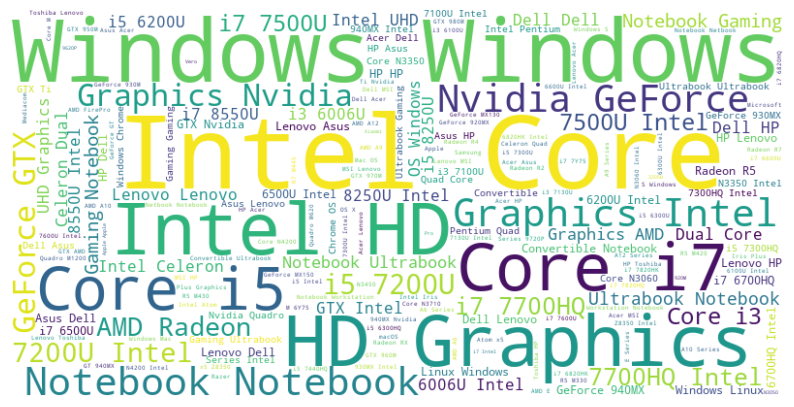

In [72]:
from wordcloud import WordCloud
text_data = ' '.join(df['Company'].astype(str)) + ' ' + \
            ' '.join(df['TypeName'].astype(str)) + ' ' + \
            ' '.join(df['Cpu'].astype(str)) + ' ' + \
            ' '.join(df['Gpu'].astype(str)) + ' ' + \
            ' '.join(df['OpSys'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

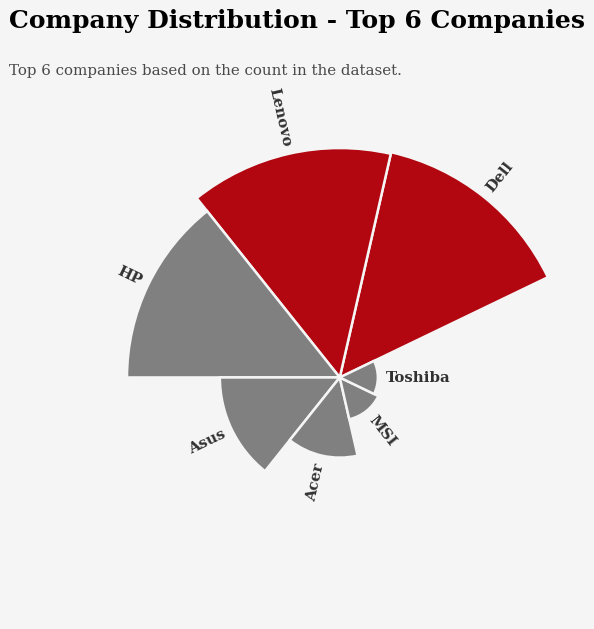

In [73]:
company_counts = df['Company'].value_counts().head(7)

# initialize the figure
fig = plt.figure(figsize=(14,7), dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax = plt.subplot(polar=True)
plt.axis('off')

# Labels
lab = company_counts.index
labels = lab

# Renkler
colors = ['#b20710', '#b20710', 'grey', 'grey', 'grey', 'grey','grey']

# Parametreler
upperLimit = company_counts.max() + 50
lowerLimit = 0
labelPadding = 10

# Yükseklik hesaplama
max_value = company_counts.max()
slope = (max_value - lowerLimit) / max_value
heights = slope * company_counts.values + lowerLimit

# Çubuk genişliği
width = 2 * np.pi / len(company_counts.index)

# Açı hesaplama
indexes = list(range(1, len(company_counts) + 1))
angles = [element * width for element in indexes]

# Çubukları çizme
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#f6f5f5",
    color=colors,
)

# Etiketleri ekleme
for bar, angle, height, label in zip(bars, angles, heights, labels):
    rotation = np.rad2deg(angle)
    alignment = "left"
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation = rotation + 180
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor",
        fontdict={'family': 'serif', 'size': 12, 'weight': 'bold', 'color': 'black'},
        alpha=0.8
    )

# Başlık ve açıklama
fig.text(0.25, 1.05, 'Company Distribution - Top 6 Companies', fontdict={'family': 'serif', 'size': 20, 'weight': 'bold', 'color': 'black'})
fig.text(0.25, 0.975, 'Top 6 companies based on the count in the dataset.', fontdict={'family': 'serif', 'size': 12, 'color': 'black'}, alpha=0.7)

# Grafik gösterimi
fig.show()

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions

---

## Conclusion:
### 📱 Touchscreen Usage:
- Non-touchscreen devices dominate the high-end laptop market, as performance-oriented users prioritize processing power, GPU capabilities, and display quality over touchscreen functionality.

### 🌟 Screen Resolution:
- Full HD remains the most common resolution, offering a balance of cost and quality, while 4K Ultra HD is preferred in premium segments by users needing high detail and color accuracy.

### 💻🎮 CPU and GPU Preferences:
- Intel CPUs hold a dominant position in the high-end market, providing reliable performance across a range of devices.
- NVIDIA GPUs lead the high-performance graphics market, excelling in gaming, content creation, and professional workstations. Intel's integrated GPUs serve lighter workloads, while AMD maintains a limited presence.

### 🎯 Diverse Use Cases:
- High-end laptops cater to a variety of needs, from gaming to professional tasks, with notable differences in screen resolution and GPU power.

## Recommendations:
### 🎯 Targeted Product Development:
- Improve Full HD and 4K Ultra HD offerings to appeal to high-end users. Incorporate features like high refresh rates and wide color gamuts for premium models.
Offer a balanced portfolio of touchscreen and non-touchscreen models, focusing on performance in the non-touchscreen category.

### 🔧 Expand AMD Offerings:
- Include AMD processors and GPUs to provide competitive alternatives, particularly in the growing gaming and professional laptop segments.

### 💡 GPU Innovation:
- Collaborate with NVIDIA to enhance gaming and content creation models. Continue advancing integrated GPU solutions to improve battery life for productivity-focused users.

### ⚙️ Customizable Options:
- Provide customizable configurations (e.g., RAM, storage, GPU) to serve a broader range of users, from gamers to professionals.

### 📣 Marketing Strategies:
- Highlight the dominance of Intel CPUs and NVIDIA GPUs in marketing campaigns to attract performance-focused users.
- Promote 4K Ultra HD laptops for content creators and professionals who require high precision and detail.

###  💻📱 Broaden Touchscreen Features:
- Introduce more 2-in-1 convertible models in the high-end category to cater to users seeking versatility.

---

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |